<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   app_id         500 non-null    int64  
 1   ssn            500 non-null    int64  
 2   zip_code       500 non-null    int64  
 3   income         500 non-null    float64
 4   homeownership  500 non-null    object 
 5   purchases      500 non-null    float64
 6   credit_limit   500 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 27.5+ KB
None
0
app_id             int64
ssn                int64
zip_code           int64
income           float64
homeownership     object
purchases        float64
credit_limit       int64
dtype: object
app_id           0
ssn              0
zip_code         0
income           0
homeownership    0
purchases        0
credit_limit     0
dtype: int64
app_id           500
ssn              500
zip_code         500
income           106
homeownersh

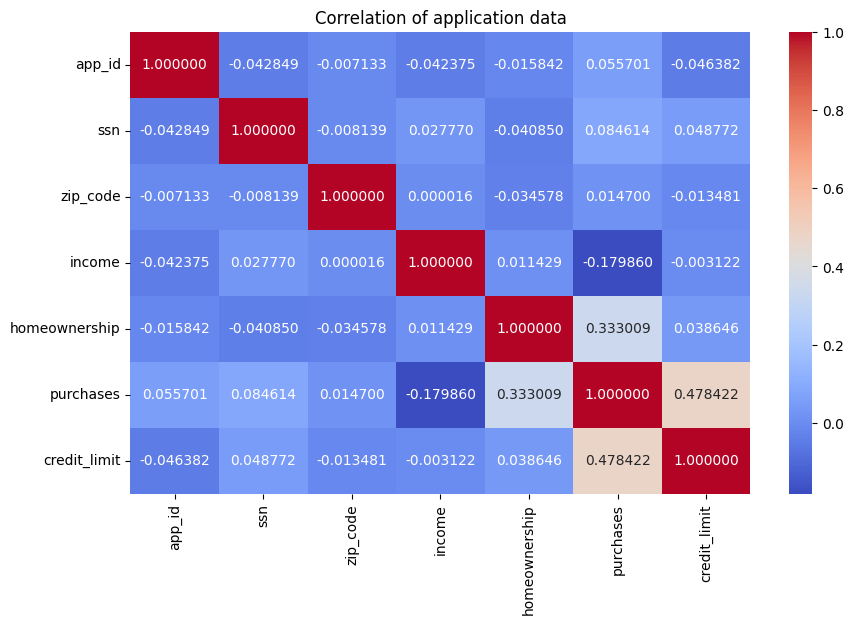

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression,Lasso,Ridge
import warnings
import statsmodels.api as sm
import joblib

warnings.filterwarnings("ignore")




applications = pd.read_csv("https://raw.githubusercontent.com/LeeMorinUCF/QMB6358F23/refs/heads/main/final_exam_2021/applications.csv")

print(applications.info())
print(applications.duplicated().sum())
print(applications.dtypes)
print(applications.isnull().sum())
print(applications.nunique())


""" turning homeownership into a dummy variable"""

applications['homeownership'] = [1 if X == "Own" else 0 for X in applications['homeownership']]



plt.figure(figsize=(10,6))
sns.heatmap(applications.corr(),fmt="f",annot=True,cmap="coolwarm")
plt.title("Correlation of application data")
plt.show()


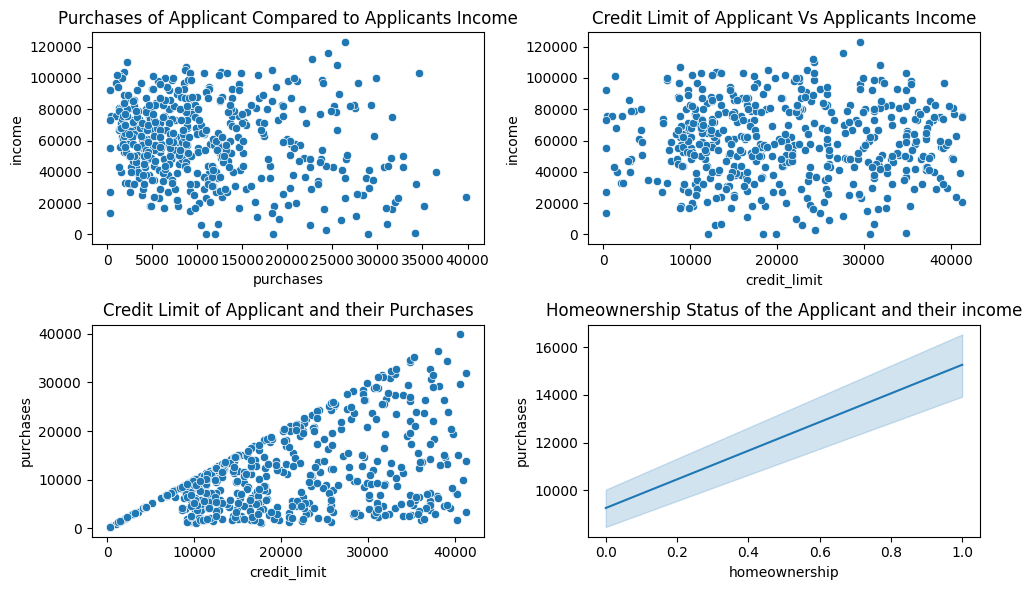

In [2]:

fig,axs = plt.subplots(2,2,figsize=(10,6))
sns.scatterplot(data=applications,ax=axs[0,0],x='purchases',y='income')
axs[0,0].set_title("Purchases of Applicant Compared to Applicants Income")

sns.scatterplot(data=applications,ax=axs[0,1],x='credit_limit',y='income')
axs[0,1].set_title("Credit Limit of Applicant Vs Applicants Income")

sns.scatterplot(data=applications,ax=axs[1,0],x='credit_limit',y='purchases')
axs[1,0].set_title("Credit Limit of Applicant and their Purchases")


sns.lineplot(data=applications,ax=axs[1,1],x='homeownership',y='purchases')
axs[1,1].set_title("Homeownership Status of the Applicant and their income")
plt.tight_layout()
plt.show()

In [3]:
app_df = applications.drop(['app_id','ssn','zip_code'],axis=1)

X0 = app_df.drop('purchases',axis=1)
y0 = app_df['purchases']

OLSapp = sm.OLS(exog=sm.add_constant(X0),endog=y0).fit()
print(f'summary of Applicants dataset : {OLSapp.summary()}')



summary of Applicants dataset :                             OLS Regression Results                            
Dep. Variable:              purchases   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     93.44
Date:                Sun, 30 Mar 2025   Prob (F-statistic):           6.03e-48
Time:                        10:07:02   Log-Likelihood:                -5110.4
No. Observations:                 500   AIC:                         1.023e+04
Df Residuals:                     496   BIC:                         1.025e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         

                ssn      zip_code         fico     num_late     past_def  \
count  3.000000e+03   3000.000000  3000.000000  3000.000000  3000.000000   
mean   5.572003e+08  55430.802000   689.291667     0.953667     0.166333   
std    2.649578e+08  26061.156481   121.678751     1.266513     0.502743   
min    1.000911e+08  10036.000000   307.000000     0.000000     0.000000   
25%    3.203142e+08  32868.000000   603.000000     0.000000     0.000000   
50%    5.616121e+08  55756.000000   692.500000     0.000000     0.000000   
75%    7.917535e+08  78154.250000   787.250000     1.000000     0.000000   
max    9.999785e+08  99977.000000   893.000000     5.000000     5.000000   

       num_bankruptcy  
count     3000.000000  
mean         0.163667  
std          0.481273  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          0.000000  
max          3.000000  
ssn               0
zip_code          0
fico              0
num_late          0
past_def          0

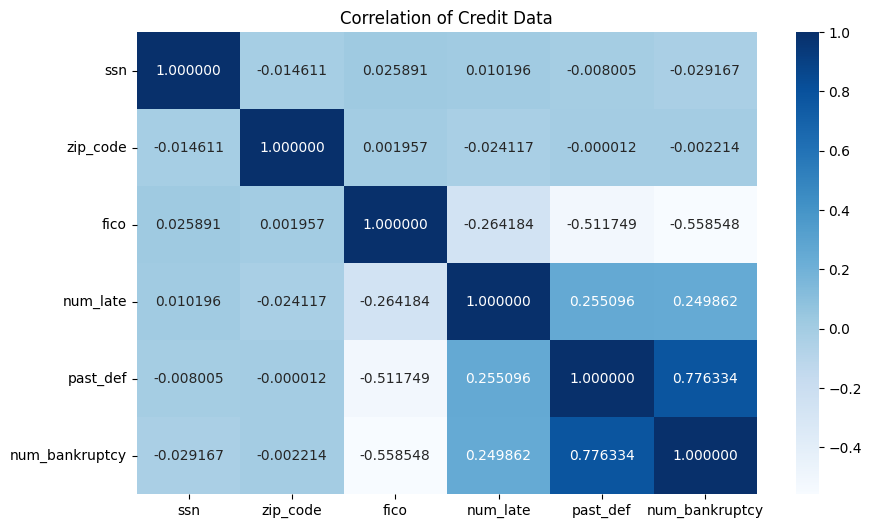

In [4]:

"""credit dataset"""

credit = pd.read_csv("https://raw.githubusercontent.com/LeeMorinUCF/QMB6358F23/refs/heads/main/final_exam_2021/credit_bureau.csv")


print(credit.describe())
print(credit.isnull().sum())
print(credit.duplicated().sum())
print(credit.dtypes)
print(credit.nunique())


plt.figure(figsize=(10,6))
sns.heatmap(credit.corr(), annot=True,fmt="f",cmap="Blues")
plt.title("Correlation of Credit Data")
plt.show()

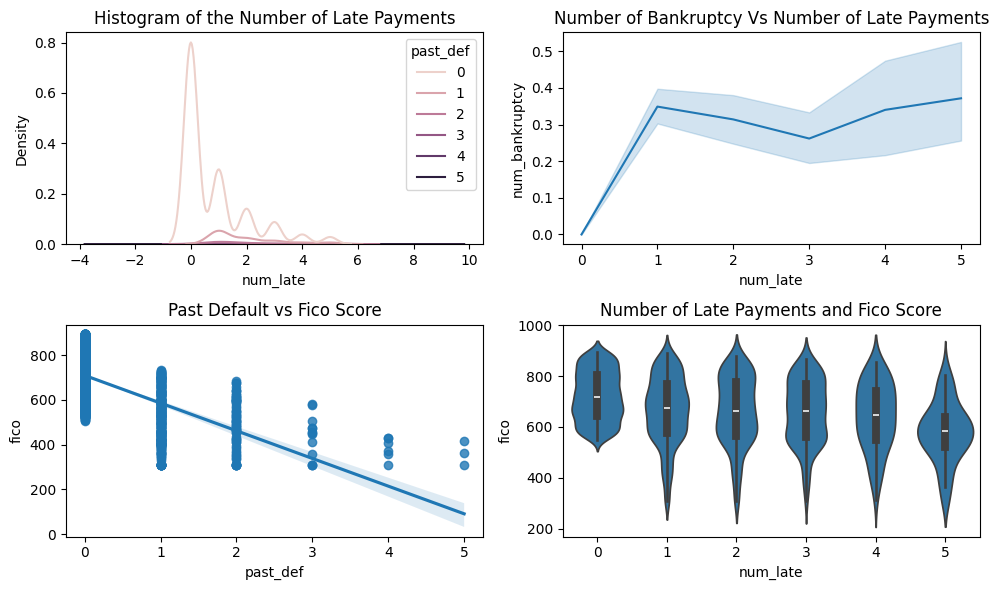

In [17]:
fig,axs = plt.subplots(2,2,figsize=(10,6))
sns.kdeplot(data=credit,ax=axs[0,0],x='num_late',hue='past_def')
axs[0,0].set_title('Histogram of the Number of Late Payments')

sns.lineplot(data=credit,ax=axs[0,1],x='num_late',y='num_bankruptcy')
axs[0,1].set_title("Number of Bankruptcy Vs Number of Late Payments")

sns.regplot(data=credit,ax=axs[1,0],x='past_def',y='fico')
axs[1,0].set_title("Past Default vs Fico Score")

sns.violinplot(data=credit,ax=axs[1,1],x='num_late',y='fico')
axs[1,1].set_title("Number of Late Payments and Fico Score")
plt.tight_layout()
plt.show()


                ssn      zip_code        fico    num_late    past_def  \
count  5.000000e+02    500.000000  500.000000  500.000000  500.000000   
mean   1.734704e+08  54619.954000  689.588000    0.894000    0.158000   
std    4.155349e+07  25880.184377  121.894425    1.195669    0.466338   
min    1.000911e+08  10039.000000  307.000000    0.000000    0.000000   
25%    1.369409e+08  31955.500000  601.750000    0.000000    0.000000   
50%    1.777900e+08  57101.500000  692.500000    0.000000    0.000000   
75%    2.104514e+08  75518.250000  789.250000    1.000000    0.000000   
max    2.404437e+08  99759.000000  893.000000    5.000000    4.000000   

       num_bankruptcy         app_id         income  homeownership  \
count      500.000000     500.000000     500.000000     500.000000   
mean         0.160000  560031.296000   59546.000000       0.304000   
std          0.463497  262395.222907   24376.059332       0.460443   
min          0.000000  102227.000000       0.000000       0.00

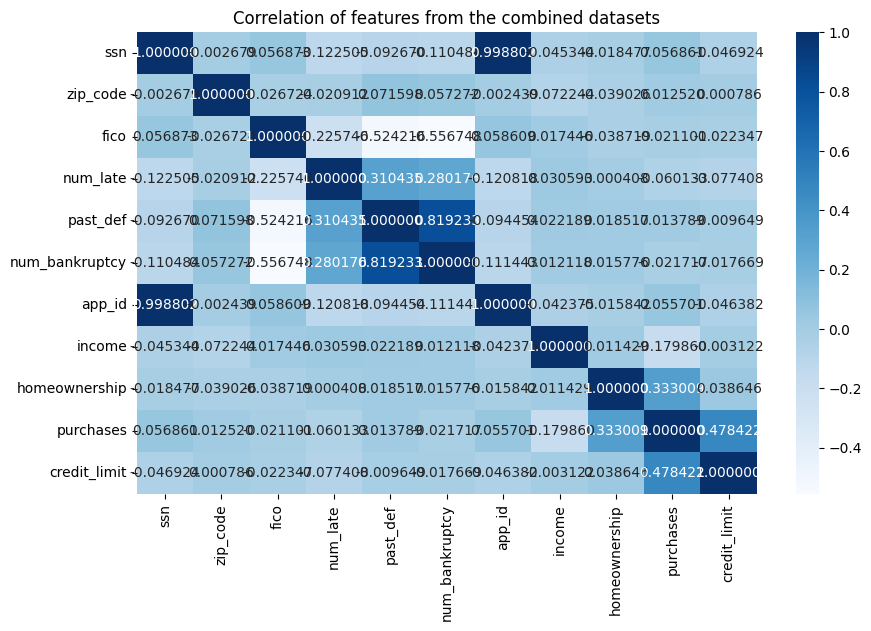

In [18]:

""" combining credit and purchases datasets"""

purch_app_pred = pd.concat([credit,applications],axis=1)
purch_app_pred = purch_app_pred.loc[:,~purch_app_pred.columns.duplicated()].copy()
purch_app_pred.isnull().sum()
purch_app_pred.dropna(inplace=True)
purch_app_pred.duplicated().sum()

print(purch_app_pred.describe())
print(purch_app_pred.dtypes)
print(purch_app_pred.nunique())

plt.figure(figsize=(10,6))
sns.heatmap(purch_app_pred.corr(),fmt="f",annot=True,cmap="Blues")
plt.title("Correlation of features from the combined datasets")
plt.show()

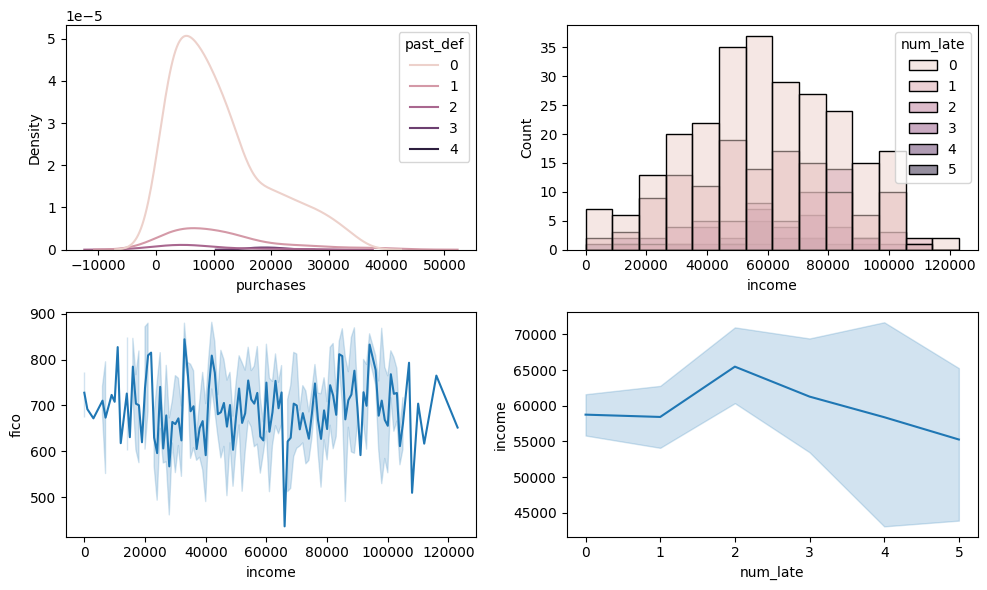

In [21]:
fig,axs = plt.subplots(2,2,figsize=(10,6))
sns.kdeplot(data=purch_app_pred,ax=axs[0,0],x='purchases',hue='past_def')
sns.histplot(data=purch_app_pred,ax=axs[0,1],x='income',hue='num_late')
sns.lineplot(data=purch_app_pred,ax=axs[1,0],x='income',y='fico')
sns.lineplot(data=purch_app_pred,ax=axs[1,1],x='num_late',y='income')
plt.tight_layout()
plt.show()


In [22]:

"""Purcahses as the dependent variable without SSN,app_id, & zip_code"""


X1 = purch_app_pred.drop(['purchases','zip_code','ssn'],axis=1)
y1 = purch_app_pred['purchases']

""" anova table for purchase app pred """

OLSpurchapppred = sm.OLS(exog=sm.add_constant(X1),endog=y1).fit()
print(f'results from the applications dataset and applications dataset: {OLSpurchapppred.summary()}')


results from the applications dataset and applications dataset:                             OLS Regression Results                            
Dep. Variable:              purchases   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     36.00
Date:                Sun, 30 Mar 2025   Prob (F-statistic):           7.96e-45
Time:                        10:11:33   Log-Likelihood:                -5107.0
No. Observations:                 500   AIC:                         1.023e+04
Df Residuals:                     491   BIC:                         1.027e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

zip_code      0
avg_income    0
density       0
dtype: int64
0
zip_code        int64
avg_income    float64
density       float64
dtype: object
zip_code      9478
avg_income    9478
density       9477
dtype: int64
           zip_code     avg_income      density
count   9478.000000    9478.000000  9478.000000
mean   54972.093163   59840.877980   340.786165
std    26138.722985   15104.647891   476.626117
min    10022.000000     507.000000     0.000006
25%    32144.500000   49631.649984    33.138615
50%    55097.000000   59898.880451   156.557973
75%    77600.500000   70024.637865   456.877072
max    99985.000000  124921.400000  4341.266568


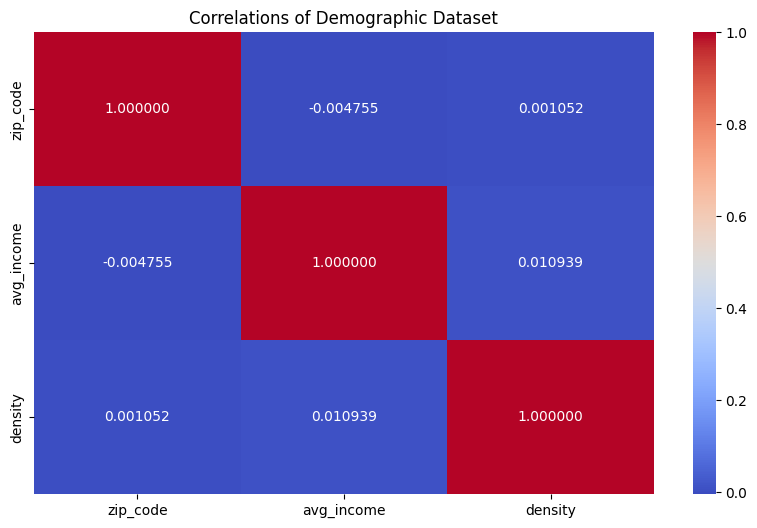

In [23]:


"""Loading in Demographic dataset"""

demographic = pd.read_csv("https://raw.githubusercontent.com/LeeMorinUCF/QMB6358F23/refs/heads/main/final_exam_2021/demographic.csv")

print(demographic.isnull().sum())
print(demographic.duplicated().sum())
print(demographic.dtypes)
print(demographic.nunique())
print(demographic.describe())


plt.figure(figsize=(10,6))
sns.heatmap(demographic.corr(),fmt="f",annot=True,cmap="coolwarm")
plt.title("Correlations of Demographic Dataset")
plt.show()

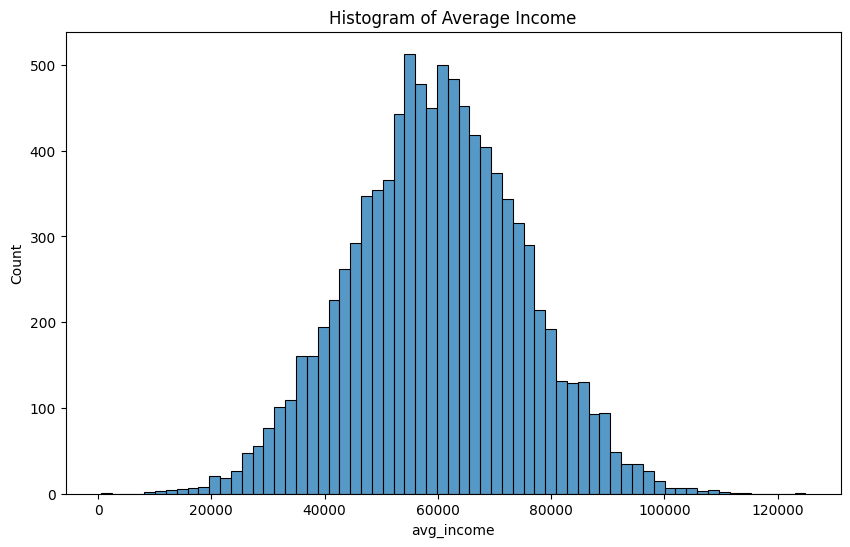

In [24]:
plt.figure(figsize=(10,6))
sns.histplot(data=demographic,x='avg_income')
plt.title("Histogram of Average Income")
plt.show()


app_id            float64
ssn               float64
zip_code          float64
income            float64
homeownership     float64
purchases         float64
credit_limit      float64
fico              float64
num_late          float64
past_def          float64
num_bankruptcy    float64
avg_income        float64
density           float64
dtype: object
              app_id           ssn      zip_code         income  \
count     500.000000  5.000000e+02    500.000000     500.000000   
mean   560031.296000  5.505287e+08  57925.572000   59546.000000   
std    262395.222907  2.662935e+08  25879.952552   24376.059332   
min    102227.000000  1.000911e+08  10654.000000       0.000000   
25%    331219.500000  3.144437e+08  35886.750000   43000.000000   
50%    567079.500000  5.598348e+08  59040.000000   59500.000000   
75%    788718.500000  7.771024e+08  80699.250000   78000.000000   
max    998685.000000  9.990927e+08  99977.000000  123000.000000   

       homeownership     purchases  credit_l

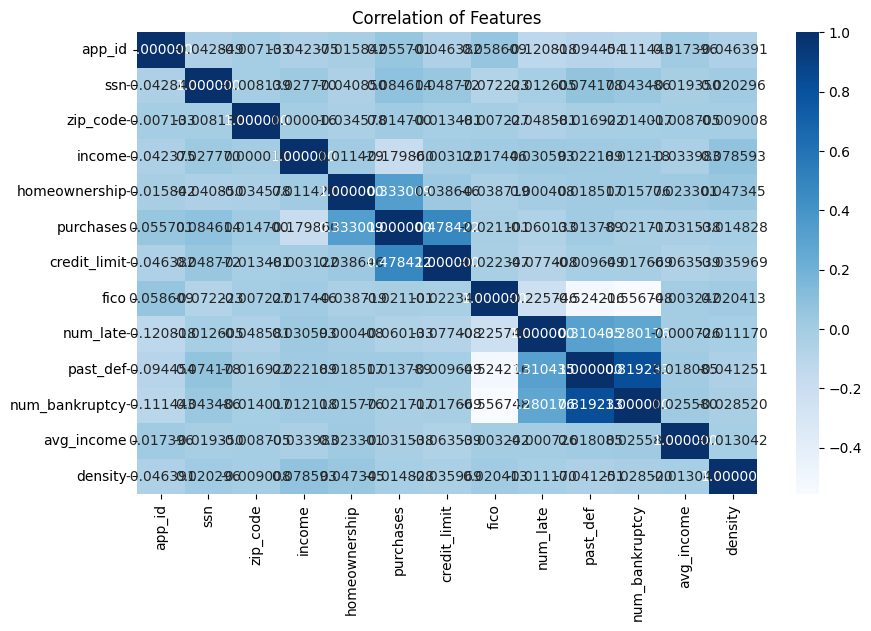

In [25]:


"""purchase full dataset"""


purchase_full = pd.concat([applications,credit,demographic],axis=1)
purchase_full = purchase_full.loc[:,~purchase_full.columns.duplicated()].copy()
print(purchase_full.dtypes)
purchase_full.dropna(inplace=True)
print(purchase_full.describe())
print(purchase_full.dtypes)
print(purchase_full.nunique())




plt.figure(figsize=(10,6))
sns.heatmap(purchase_full.corr(),fmt="f",annot=True,cmap="Blues")
plt.title("Correlation of Features")
plt.show()

In [29]:


""" Dropping SSN,zip code and app_id"""
X2 = purchase_full.drop(['app_id','ssn','zip_code'],axis=1)
y2 = purchase_full['purchases']




"""Creating Utilization Variable"""
utilization = purchase_full['purchases'] / purchase_full['credit_limit']



print(f'max utils: {np.max(utilization)}')
print(f'Minimum Utilization: {np.min(utilization)}')
print(f'Average Utilization: {np.mean(utilization)}')
print(f'Description of Utilization: {utilization}')

max utils: 0.9999999984305333
Minimum Utilization: 0.04416729614362861
Average Utilization: 0.5901759757550893
Description of Utilization: 0      0.999083
1      0.563357
2      0.445706
3      0.352985
4      0.343716
         ...   
495    0.885424
496    0.298462
497    0.182129
498    0.357405
499    0.941708
Length: 500, dtype: float64


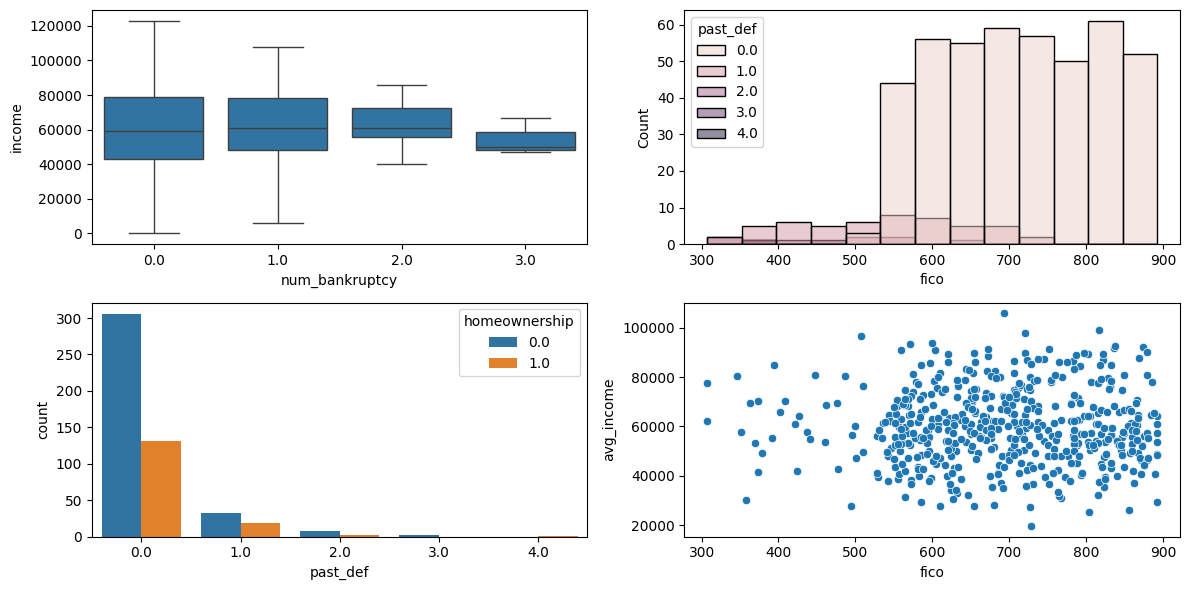

In [31]:
fig,axs = plt.subplots(2,2,figsize=(12,6))
sns.boxplot(data=purchase_full,ax=axs[0,0],x='num_bankruptcy',y='income')
sns.histplot(data=purchase_full,ax=axs[0,1],x='fico',hue='past_def')
sns.countplot(data=purchase_full,ax=axs[1,0],x='past_def',hue='homeownership')
sns.scatterplot(data=purchase_full,ax=axs[1,1],x='fico',y='avg_income')
plt.tight_layout()
plt.show()

In [32]:

""" Utils as as function of other 'relevant' variables"""

X3 = purchase_full.drop(['ssn','app_id','zip_code'],axis=1)
y3= utilization




OLSutils = sm.OLS(exog=sm.add_constant(X3), endog=y3).fit()
print(f'ANOVA Table from utils: {OLSutils.summary()}')

ANOVA Table from utils:                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     221.9
Date:                Sun, 30 Mar 2025   Prob (F-statistic):          1.31e-174
Time:                        10:15:10   Log-Likelihood:                 274.10
No. Observations:                 500   AIC:                            -526.2
Df Residuals:                     489   BIC:                            -479.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0

In [33]:


'''new variable called 'log-odds utils'''

log_utilization = np.log(utilization) / (utilization - 1)


y4 = log_utilization



def evaluate(y_test,pred,r2,mse,cv_scores,model_name):
    results = {
        "Model":model_name,
        "R2 Score":r2,
        "Mean Squared Error":mse,
        "Cross-Validation Score":cv_scores.mean()
        }
    return results



models = {
    "linearregression":LinearRegression(),
    "lasso":Lasso(),
    "ridge":Ridge(),

    }



datasets = {
    "Applications": (X0, y0),
    "Purch App Pred": (X1, y1),
    "Purchase Full": (X2, y2),
    "Utility": (X3, y3),
    "Log-Odds Utils":(X3,y4)
}

results = []

for dataset_name,(X,y) in datasets.items():
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        
        r2 = r2_score(y_test, pred)
        mse = mean_squared_error(y_test, pred)
        cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='r2')
        results.append(evaluate(y_test, pred, r2, mse, cv_scores, f"{model_name} on {dataset_name}"))

df_results = pd.DataFrame(results)
pd.set_option('display.max_rows', 30)
print(df_results.sort_values(by="R2 Score",ascending=False))

                                 Model  R2 Score  Mean Squared Error  \
6    linearregression on Purchase Full  1.000000        4.007787e-22   
8               ridge on Purchase Full  1.000000        1.801639e-13   
7               lasso on Purchase Full  1.000000        3.174777e-03   
11                    ridge on Utility  0.824977        1.756247e-02   
9          linearregression on Utility  0.824900        1.757012e-02   
10                    lasso on Utility  0.822344        1.782668e-02   
14             ridge on Log-Odds Utils  0.782801        5.522951e-02   
12  linearregression on Log-Odds Utils  0.782743        5.524431e-02   
13             lasso on Log-Odds Utils  0.779494        5.607061e-02   
4              lasso on Purch App Pred  0.416916        5.024415e+07   
3   linearregression on Purch App Pred  0.416908        5.024483e+07   
5              ridge on Purch App Pred  0.416626        5.026913e+07   
0     linearregression on Applications  0.407966        5.101537

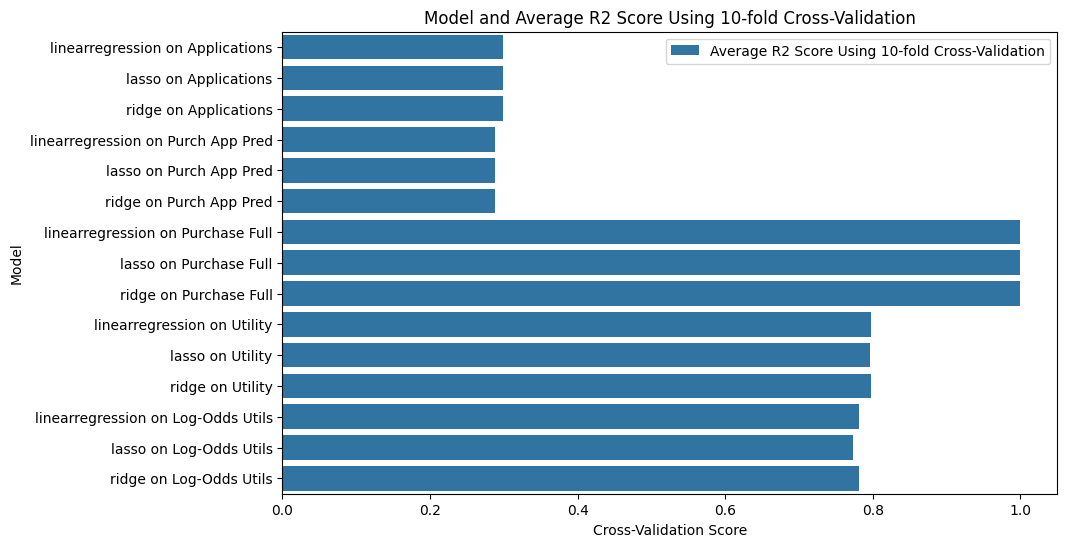

In [34]:
plt.figure(figsize=(10,6))
sns.barplot(x=df_results['Cross-Validation Score'],y=df_results['Model'],label="Average R2 Score Using 10-fold Cross-Validation")
plt.title("Model and Average R2 Score Using 10-fold Cross-Validation")
plt.legend()
plt.show()


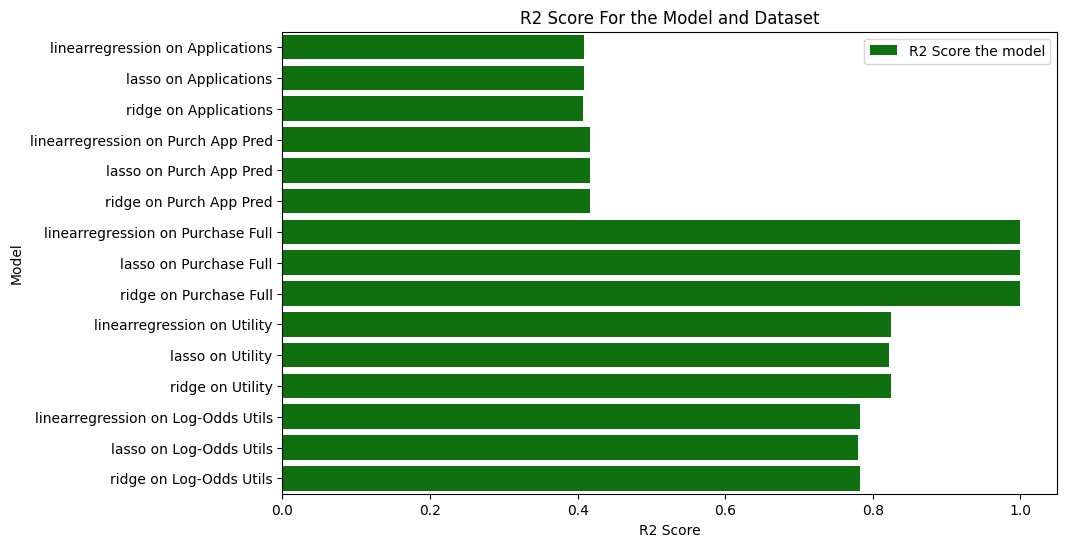

In [35]:
plt.figure(figsize=(10,6))
sns.barplot(x=df_results['R2 Score'],y=df_results['Model'],label="R2 Score the model",color="green")
plt.title("R2 Score For the Model and Dataset")
plt.legend()
plt.show()


In [38]:

'''GridSearch for Optimal Parameters'''


linearregression_params ={
    'fit_intercept': [True, False],  
    'n_jobs': [None, -1],  
    'positive': [True, False]
}

lasso_params = {
    'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100],

}

ridge_params = {
    'alpha': [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100],

}

models = {
    "LinearRegression":(LinearRegression(),linearregression_params),
    "Lasso":(Lasso(),lasso_params),
    "ridge":(Ridge(),ridge_params)
    }

best_scores = []

X_train,X_test,y_train,y_test = train_test_split(X3,y4,test_size=.20,random_state=42)

for model_name,(model,params) in models.items():
    model.fit(X_train,y_train)
    grid_search = GridSearchCV(model,params,scoring="r2",cv=5,n_jobs=-1)
    grid_search.fit(X_train,y_train)
    print(f'Best Params for {model_name}: {grid_search.best_params_}')
    print(f'Best Score for {model_name}: {grid_search.best_score_}')
    best_scores.append({"Model":model_name,"Best Score":grid_search.best_score_})
    
best_scores_df = pd.DataFrame(best_scores)
print(best_scores_df)

Best Params for LinearRegression: {'fit_intercept': True, 'n_jobs': None, 'positive': False}
Best Score for LinearRegression: 0.7782514786246748
Best Params for Lasso: {'alpha': 0.01}
Best Score for Lasso: 0.7792761176569247
Best Params for ridge: {'alpha': 20}
Best Score for ridge: 0.7796940848100867
              Model  Best Score
0  LinearRegression    0.778251
1             Lasso    0.779276
2             ridge    0.779694


In [41]:
''' Using the hyper-parameters for the best models'''

linear_regression_model = LinearRegression(copy_X=True,positive=False).fit(X_train,y_train)
lr_pred = linear_regression_model.predict(X_test)
print('R2 Score of the optimized Linear Regression Model\n')
print(r2_score(y_test,pred))

lasso_model = Lasso(0.001).fit(X_train,y_train)
lasso_pred = lasso_model.predict(X_test)
print('Results From Optimal Lasso Parameters\n')
print(r2_score(y_test, lasso_pred))


'''ridge'''
ridge_model = Ridge(alpha=19.9).fit(X_train,y_train)
ridge_pred = ridge_model.predict(X_test)
print('Optimized Ridge Parameters\n')
print(r2_score(y_test, ridge_pred))



R2 Score of the optimized Linear Regression Model

0.7828014140490629
Results From Optimal Lasso Parameters

0.7820009596089221
Optimized Ridge Parameters

0.7836659903359322


In [45]:



def predict(model,features):

    predictions = model.predict(features)

    return predictions.tolist()

if __name__ == "__main__":

    model = joblib.load("models/ridge.joblib")
    

    features = joblib.load("models/features.joblib")

    predictions = predict(model,features)
    
    print('Predictions:')
    for i, pred in enumerate(predictions,start=1): 
        if i % 10 == 0:
            print(f"Sample {i}: Predicted Utility = {np.round(pred,2)}")

Predictions:
Sample 10: Predicted Utility = 1.47
Sample 20: Predicted Utility = 1.68
Sample 30: Predicted Utility = 1.69
Sample 40: Predicted Utility = 2.1
Sample 50: Predicted Utility = 1.0
Sample 60: Predicted Utility = 1.66
Sample 70: Predicted Utility = 0.92
Sample 80: Predicted Utility = 2.58
Sample 90: Predicted Utility = 1.74
Sample 100: Predicted Utility = 0.91
Sample 110: Predicted Utility = 1.08
Sample 120: Predicted Utility = 2.12
Sample 130: Predicted Utility = 0.95
Sample 140: Predicted Utility = 1.22
Sample 150: Predicted Utility = 1.17
Sample 160: Predicted Utility = 1.64
Sample 170: Predicted Utility = 2.34
Sample 180: Predicted Utility = 1.82
Sample 190: Predicted Utility = 1.08
Sample 200: Predicted Utility = 0.51
Sample 210: Predicted Utility = 1.37
Sample 220: Predicted Utility = 1.3
Sample 230: Predicted Utility = 1.85
Sample 240: Predicted Utility = 1.84
Sample 250: Predicted Utility = 1.12
Sample 260: Predicted Utility = 1.38
Sample 270: Predicted Utility = 2.38
